## SVM Mini Project

**This is a mini project to apply my recent knowledge of Support Vector Machines (SVM).**

**Import the required libraries and methods:**

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import  classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

A method I'll need later

In [13]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

**Now, let’s load our data and perform Exploratory Data Analysis (EDA).**

For this mini project, I will be using a food dataset. As you’ll see later, the dataset contains 17 features, each representing a type of nutrient in a food item, such as Calories, Total Fat, and so on. All of these features are numerical values. The target variable represents two classes: “Less Often” (0) and “More Often” (1), designed to help diabetes patients choose suitable foods. The main objective of this project is to build an SVM model that accurately classifies food items into these two categories, assisting in healthier dietary decisions for diabetes management.

In [2]:
food_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/food_items_binary.csv")
food_df.head()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,0
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,0
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,0
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,0
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,0


In [4]:
food_df.info()

food_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7639 entries, 0 to 7638
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Calories             7639 non-null   float64
 1   Total Fat            7639 non-null   int64  
 2   Saturated Fat        7639 non-null   float64
 3   Monounsaturated Fat  7639 non-null   float64
 4   Polyunsaturated Fat  7639 non-null   float64
 5   Trans Fat            7639 non-null   float64
 6   Cholesterol          7639 non-null   int64  
 7   Sodium               7639 non-null   float64
 8   Total Carbohydrate   7639 non-null   float64
 9   Dietary Fiber        7639 non-null   float64
 10  Sugars               7639 non-null   float64
 11  Sugar Alcohol        7639 non-null   int64  
 12  Protein              7639 non-null   float64
 13  Vitamin A            7639 non-null   int64  
 14  Vitamin C            7639 non-null   int64  
 15  Calcium              7639 non-null   i

,count,mean,std,min,25%,50%,75%,max
Calories,7639.0,105.098835,77.224368,0.0,50.0,100.0,140.0,2210.0
Total Fat,7639.0,2.318235,3.438941,0.0,0.0,1.0,3.0,24.0
Saturated Fat,7639.0,0.368920,0.737164,0.0,0.0,0.0,0.5,8.0
Monounsaturated Fat,7639.0,0.309216,1.310260,0.0,0.0,0.0,0.0,16.8
Polyunsaturated Fat,7639.0,0.264116,2.848250,0.0,0.0,0.0,0.0,235.0
Trans Fat,7639.0,0.007069,0.094783,0.0,0.0,0.0,0.0,2.5
Cholesterol,7639.0,4.308679,14.788162,0.0,0.0,0.0,0.0,450.0
Sodium,7639.0,235.053659,252.438163,0.0,20.0,150.0,375.5,2220.0
Total Carbohydrate,7639.0,15.510719,14.028570,0.0,3.7,13.0,24.0,270.0
Dietary Fiber,7639.0,1.806074,4.099947,0.0,0.0,1.0,3.0,305.0


In [5]:
#Let’s split the dataset

X = food_df.iloc[:, :-1]
y = food_df.iloc[:, -1:]

In [9]:
y.value_counts(normalize = True)

,proportion
class,
0,0.870402
1,0.129598


<Axes: xlabel='class'>

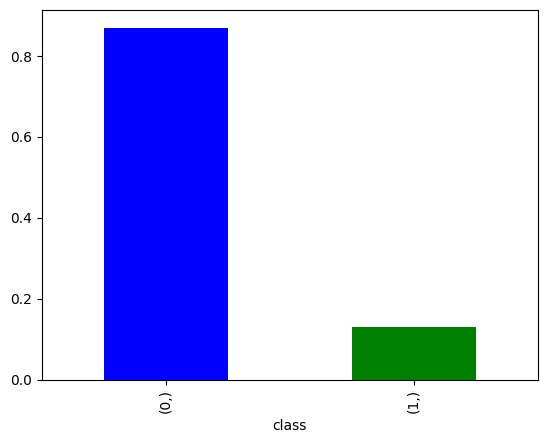

In [10]:
y.value_counts(normalize = True).plot.bar(color=['blue', 'green'])

**Now, let’s build an SVM model.**

In [12]:
#Random state variable
rs = 42

#Split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=rs)

In [14]:
#Let's build a deafult SVM .

model = SVC()

model.fit(X_train, y_train.values.ravel())
model_pred = model.predict(X_test)

**let's see the results**

In [15]:
evaluate_metrics(y_test, model_pred)

{'accuracy': 0.9679319371727748,
 'recall': 0.8434343434343434,
 'precision': 0.9027027027027027,
 'f1score': 0.8720626631853786}

**As we can see, the default SVM model performed well on our dataset, achieving an accuracy of 96% and an F1 score of 87. However, by applying further regularization and experimenting with different kernels, we can achieve even better results.**

Our dataset is well-suited for an SVM with an RBF kernel because it has a relatively small number of features (17) and a moderate number of rows (7,638).

**Let's try**

In [18]:
model2 = SVC(C=10, kernel='rbf')
model2.fit(X_train, y_train.values.ravel())
model2_pred = model2.predict(X_test)
evaluate_metrics(y_test, model2_pred)

{'accuracy': 0.9679319371727748,
 'recall': 0.8636363636363636,
 'precision': 0.8860103626943006,
 'f1score': 0.8746803069053708}

That’s interesting I got the same accuracy, but the F1 score increased by 0.02, which is a good improvement. :)

Now, let’s try different values of C.

In [19]:
max_c = 40
f1_scores  = []

for c in range(1, max_c+1):
    svm = SVC(C=c, kernel='rbf')
    svm.fit(X_train, y_train.values.ravel())
    pred = svm.predict(X_test)

    f1 = f1_score(pred, y_test)
    f1_scores.append((c, round(f1_score(y_test, pred), 4)))

f1_result = pd.DataFrame(f1_scores, columns=['C', 'F1 Score'])
f1_result.set_index('C', inplace=True)
f1_result

,F1 Score
C,
1,0.8721
2,0.8682
3,0.8645
4,0.8689
5,0.8718
6,0.8740
7,0.8740
8,0.8747
9,0.8747


(0.8, 1.0)

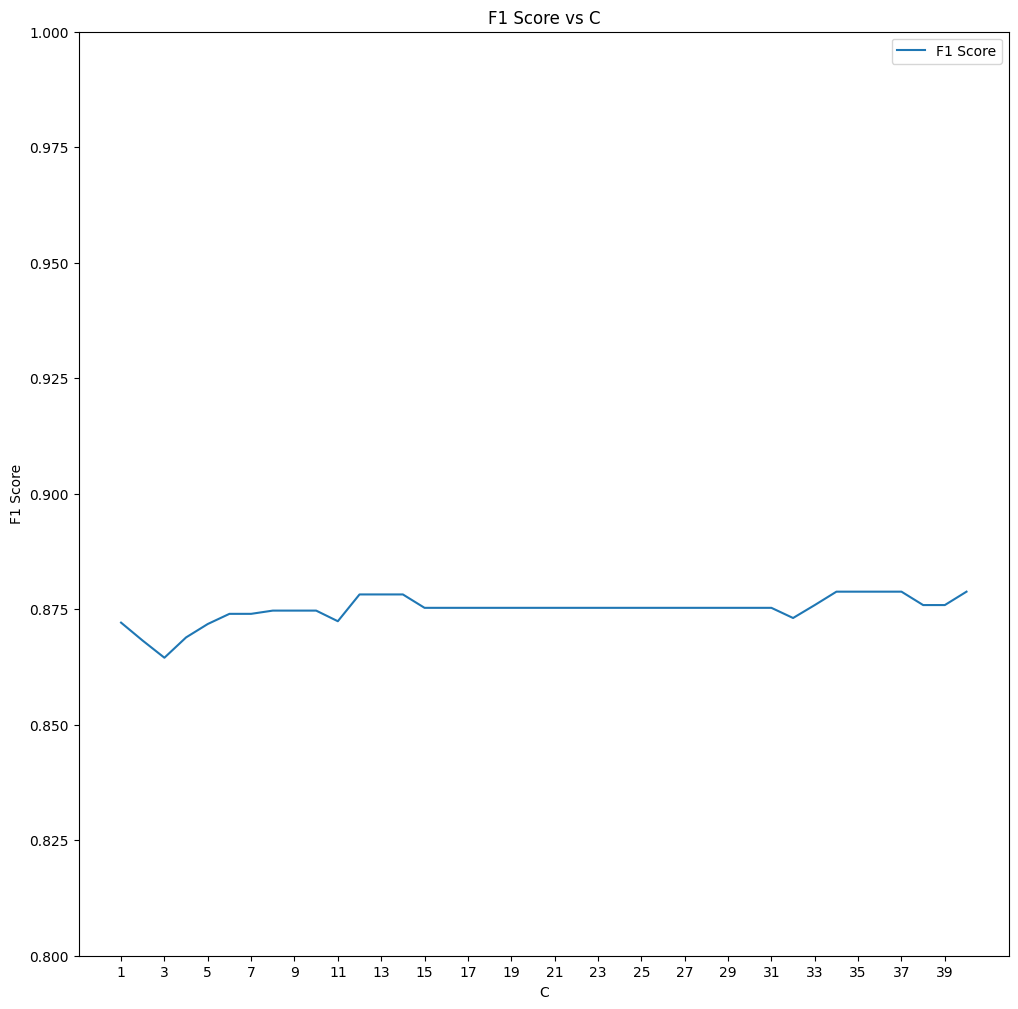

In [20]:
ax = f1_result.plot(figsize=(12, 12))
ax.set_xlabel('C')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score vs C')

ax.set_xticks(range(1, max_c+1, 2))
plt.ylim(0.8, 1)

**As we can see from the graph, the best value for C might be greater than 40. However, using a simple loop to find the optimal C is not the most efficient approach. Instead, we can tune our hyperparameters, including C and the kernel, using cross-validation with GridSearchCV, which provides a more systematic and reliable method for model optimization.**

In [21]:
params_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid']
}

In [22]:
model3 = SVC()

grid_search = GridSearchCV(estimator=model3, param_grid=params_grid, scoring='f1', cv = 5, verbose=1)

grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'C': 100, 'kernel': 'rbf'}

**As we can see, my previous assumption was correct: the best value for C is 100, which is greater than 40, and the optimal kernel to use is RBF.**

Now, let’s create a model using the optimal parameters.

In [23]:
model_opt  = SVC(C=100, kernel='rbf')
model_opt.fit(X_train, y_train.values.ravel())
model_opt_pred = model_opt.predict(X_test)

evaluate_metrics(y_test, model_opt_pred)

{'accuracy': 0.9705497382198953,
 'recall': 0.8939393939393939,
 'precision': 0.8805970149253731,
 'f1score': 0.8872180451127819}

**As we can see, we achieved overall good improvements using the optimal parameters.**